
## Project:Medical Representative

Medical representatives are the key point of contact between
pharmaceutical and medical companies and healthcare professionals.
A medical representative's job is to promote and sell their company's
products, whether that's pharmaceutical drugs or medical equipment.
Customers can include doctors, nurses and pharmacists. The medical
representative will increase product awareness, answer queries,
company.

The job of medical representative has a lot of challenges but the most
important one is how the medical representative convinces a doctor to write a
drug from the medical company which he works for in his prescription where
there are many competitors' drugs that have the same active ingredient from
other companies.
The goal is to know if a doctor with some
specific features will write or not one of 6 drugs for a medical
company that has license to produce several types of local produced
drugs with the same active ingredients of multinational original drugs.

## The company needs to reduce the cost of sending medical representatives to doctors who are not likely to write the medicine in the prescription.
* Understanding the Company's need is very important for the approach of defining and working on the project

## Objectives of the project:
* ## Analyze the data to make advices to increase the effeciency of sending the medical representatives to doctors who are more likely to write the medicine in the prescription.
* ## Devolop a ML model to predict whether the doctor will write the medicine in the prescription or not based on the input features.

## Exploring the Data
In this part i'm going to explore the data and all the features.

### Datasets and Inputs
The dataset was collected by me in a year from private clinics,
hospitals and pharmacies
All data are public data that was collected from doctors and
pharmacists about 6 drugs produced by a certain medical company.


In [78]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Pretty display for notebooks
%matplotlib inline
%load_ext sql
import sqlite3

con = sqlite3.connect("med.db")
cur = con.cursor()
%sql sqlite:///med.db



The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: @med.db'

## Feature Set Exploration
### Input Data fields (Features and Labels)
The input data consists of 390 samples collected from 253 doctors.
This data will be used for training and validation test in a data base file
named **med** attached with the project proposal.
the data in database called **med** and splited in two tables connected by the id column.
#### table 1 : medicine_table
* **id_m:** row id for every medicine and it is compatable with id_dr column in doctor_table
* **medicine:** The commercial name of the medicine that I refer to it as type1 to type6.
* **Price:** price for every drug of these 6 drugs for patient.

#### table 2 : doctor_table
* **id_dr:** row id for every doctor and it is compatable with id_m column in medicine_table
* **exam_price:** examination price that the doctor takes from the patient.
* **clinic_hos:** classification if this doctor has a private 'clinic' or works in a 'hospital'.
* **dr_class:** doctor class was classified according to number of patients for every doctor and how much is this doctor famous and it was classified to 'a' and 'b'.

**where:**

* **class a:** are doctors with high patient rate
* **class b:** are doctors with medium patient rate
* **area:** every medical representative cover some areas in a city where the medical representative has to make a lot of visits for alot of doctors in different places and I refer to each area with the name (area1 to area8)with total 8 areas that I have covered to make my prospection.
* **specialty:** the specialty of the doctor is one of the most important features because it will determine which of the 6 drugs will be suitable for this doctor to write it in his prescription. 

**These specialties are:**
* **Chest:** chest specialist
* **Im:** internal medicine specialist
* **Cd:** cardiology specialist
* **Neuro:** neurology specialist
* **Git:** gastrointestinal tract specialist
* **Ent:** ear, nose and throat specialist
* **Sur:** surgery specialist
* **Uro:** urology specialist
* **Gp:** general practitioner
* **Or:** orthopedic specialist
* **Vas:** vascular specialst

**With total 11 specialties.**

* **Target (label):** just one target to classify if this doctor write any of these drugs in prescription to his patients or not. With (1) if the doctor writes the drug in his prescription and (0)if not.

## Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of doctors who wrote any of the 6 drugs in their prescription. In the code cell below, i will compute the following:

The total number of records, 'n_records'

The number of doctors who wrote any of the 6 drugs in their prescription, 'n_doctor_who_write'.

The number of doctors who didn't write any of the 6 drugs in their prescription, 'n_doctor_who_not_write'.

The percentage of doctors who wrote any of the 6 drugs in their prescription , 'write_percent'.

In [79]:
%sql SELECT * FROM medicine_table ;

 * sqlite:///med.db
Done.


id_m,medicine,price
1,type1,45
2,type4,36
3,type1,45
4,type1,45
5,type5,29
6,type5,29
7,type6,20
8,type4,36
9,type2,30
10,type2,30


In [80]:
%sql SELECT * FROM doctor_table ;

 * sqlite:///med.db
Done.


id_dr,area,speciality,dr_class,exam_price,clinic_hos,write
1,area1,chest,a,200,clinic,1
2,area2,im,b,100,clinic,1
3,area8,chest,a,75,hospital,1
4,area5,chest,a,30,hospital,1
5,area6,uro,a,220,clinic,0
6,area8,im,b,140,clinic,1
7,area2,im,b,70,hospital,1
8,area8,chest,a,75,hospital,0
9,area3,cd,b,150,clinic,1
10,area1,neuro,b,150,clinic,1


## Data Preparation 

In [81]:
q1 = "select * from medicine_table"
q2 = "select * from doctor_table"
df_m = pd.read_sql(q1, con)
df_d = pd.read_sql(q2, con)
con.close()
df_comp = df_m.merge(df_d, how = "inner", left_on = "id_m", right_on = "id_dr")
display(df_m)
display(df_d)
display(df_comp)


,id_m,medicine,price
0,1,type1,45
1,2,type4,36
2,3,type1,45
3,4,type1,45
4,5,type5,29
...,...,...,...
385,386,type5,29
386,387,type2,30
387,388,type1,45
388,389,type1,45


,id_dr,area,speciality,dr_class,exam_price,clinic_hos,write
0,1,area1,chest,a,200,clinic,1
1,2,area2,im,b,100,clinic,1
2,3,area8,chest,a,75,hospital,1
3,4,area5,chest,a,30,hospital,1
4,5,area6,uro,a,220,clinic,0
...,...,...,...,...,...,...,...
385,386,area8,sur,b,75,hospital,0
386,387,area2,im,b,70,hospital,0
387,388,area7,im,a,120,clinic,1
388,389,area8,sur,b,75,hospital,1


,id_m,medicine,price,id_dr,area,speciality,dr_class,exam_price,clinic_hos,write
0,1,type1,45,1,area1,chest,a,200,clinic,1
1,2,type4,36,2,area2,im,b,100,clinic,1
2,3,type1,45,3,area8,chest,a,75,hospital,1
3,4,type1,45,4,area5,chest,a,30,hospital,1
4,5,type5,29,5,area6,uro,a,220,clinic,0
...,...,...,...,...,...,...,...,...,...,...
385,386,type5,29,386,area8,sur,b,75,hospital,0
386,387,type2,30,387,area2,im,b,70,hospital,0
387,388,type1,45,388,area7,im,a,120,clinic,1
388,389,type1,45,389,area8,sur,b,75,hospital,1


In [82]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 389
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_m        390 non-null    int64 
 1   medicine    390 non-null    object
 2   price       390 non-null    int64 
 3   id_dr       390 non-null    int64 
 4   area        390 non-null    object
 5   speciality  390 non-null    object
 6   dr_class    390 non-null    object
 7   exam_price  390 non-null    int64 
 8   clinic_hos  390 non-null    object
 9   write       390 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 33.5+ KB


--------------------

## Data Cleaning

In [83]:
df_comp.drop("id_dr", axis = 1, inplace = True) # redundunt column

In [84]:
df_comp.isnull().any()

id_m          False
medicine      False
price         False
area          False
speciality    False
dr_class      False
exam_price    False
clinic_hos    False
write         False
dtype: bool

## duplicates

In [85]:
df_comp.duplicated('id_m').sum()

0

* ## No duplicates

In [86]:
df_comp_w = df_comp[df_comp["write"] == 1]
df_comp_w

,id_m,medicine,price,area,speciality,dr_class,exam_price,clinic_hos,write
0,1,type1,45,area1,chest,a,200,clinic,1
1,2,type4,36,area2,im,b,100,clinic,1
2,3,type1,45,area8,chest,a,75,hospital,1
3,4,type1,45,area5,chest,a,30,hospital,1
5,6,type5,29,area8,im,b,140,clinic,1
...,...,...,...,...,...,...,...,...,...
382,383,type1,45,area2,im,b,70,hospital,1
383,384,type4,36,area5,git,b,30,hospital,1
387,388,type1,45,area7,im,a,120,clinic,1
388,389,type1,45,area8,sur,b,75,hospital,1


In [87]:
df_comp_nw = df_comp[df_comp["write"] == 0]

In [88]:
print(df_comp.dtypes)

id_m           int64
medicine      object
price          int64
area          object
speciality    object
dr_class      object
exam_price     int64
clinic_hos    object
write          int64
dtype: object


## Skewness

In [89]:
numeric_data = df_comp.select_dtypes(include = ["int64", "float64"])
numeric_data

,id_m,price,exam_price,write
0,1,45,200,1
1,2,36,100,1
2,3,45,75,1
3,4,45,30,1
4,5,29,220,0
...,...,...,...,...
385,386,29,75,0
386,387,30,70,0
387,388,45,120,1
388,389,45,75,1


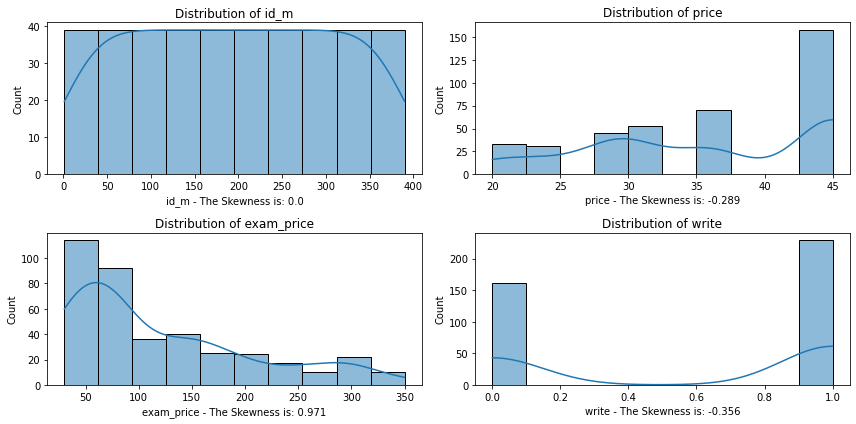

In [90]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

for i in range(len(numeric_data.columns)):
    ax = axs[i // 2, i % 2]
    column_name = numeric_data.columns[i]
    sns.histplot(df_comp[column_name], kde=True, ax=ax)
    skewness = df_comp[column_name].skew()
    ax.set_xlabel(f"{column_name} - The Skewness is: {round(skewness, 3)}")
    ax.set_title(f"Distribution of {column_name}")

plt.tight_layout()
plt.show()

In [91]:
high_skew = []
for i in range(len(numeric_data.columns)):
    if abs(numeric_data[numeric_data.columns[i]].skew()) > 1:
          high_skew.append(numeric_data.columns[i])

high_skew

[]

## Key Findings

- **No Skewness Detected:** 
  - The skewness values for all relevant variables in our dataset are close to zero, indicating that the distributions are approximately symmetric. 
  - A skewness value between -0.5 and 0.5 typically suggests that the data is fairly symmetrical.

## Conclusion

Since there is no significant skewness in the data, we can proceed with analyses that assume normality without concern for the biases introduced by skewed distributions.

------------------------------------------------------------

## Exploratory Data Analysis (EDA)

-------------------

## percentage of doctors who wrote the medicine in prescription to who didn't

In [92]:
doc_write = numeric_data["write"].sum()
doc_n_write = numeric_data[numeric_data["write"] != 1]["write"].count()
print(doc_write)
print(doc_n_write)
print("percentage of doctors write the medicine is {} %".format(round((doc_write / df_comp.shape[0]) * 100, 2)))

229
161
percentage of doctors write the medicine is 58.72 %


## Number of Doctors for each class

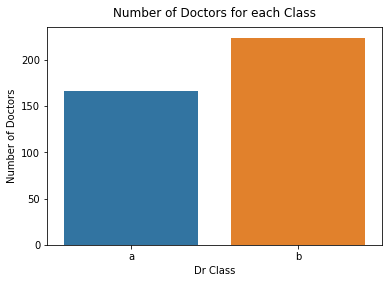

In [93]:
g = sns.countplot(data = df_comp, x = "dr_class")
g.set(xlabel ="Dr Class", ylabel = "Number of Doctors")
g.set_title("Number of Doctors for each Class", y = 1.02)
plt.show()

In [94]:
doc_a = df_comp[df_comp["dr_class"] == "a"]["write"].count()
print("number of doctors with class a is {}".format(doc_a))
doc_b = df_comp[df_comp["dr_class"] == "b"]["write"].count()
print("number of doctors with class b is {}".format(doc_b))

number of doctors with class a is 166
number of doctors with class b is 224


## Number of Doctors for each class who wrote the medicine in the prescription VS. who didn't

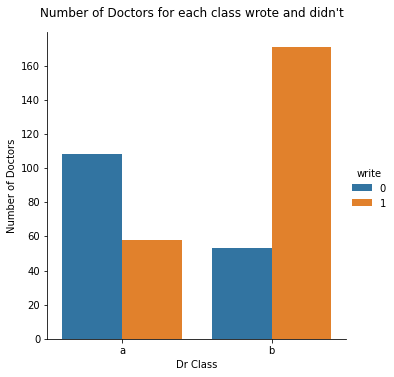

In [95]:
g = sns.catplot(data = df_comp, x = "dr_class", kind = "count", hue = "write")
g.set(xlabel ="Dr Class", ylabel = "Number of Doctors")
g.fig.suptitle("Number of Doctors for each class wrote and didn't", y = 1.04)
plt.show()

In [96]:
doc_write_a = df_comp[(df_comp["dr_class"] == "a") & (df_comp["write"] == 1)]["write"].sum() 
print("doctors who wrote the medicine from class a is {}".format(doc_write_a))
doc_write_b = df_comp[(df_comp["dr_class"] == "b") & (df_comp["write"] == 1)]["write"].sum()
print("doctors who wrote the medicine from class b is {}".format(doc_write_b))
doc_n_write_a = df_comp[(df_comp["dr_class"] == "a") & (df_comp["write"] == 0)]["write"].count() 
print("doctors who didn't write the medicine from class a is {}".format(doc_n_write_a))
doc_n_write_b = df_comp[(df_comp["dr_class"] == "b") & (df_comp["write"] == 0)]["write"].count() 
print("doctors who didn't write the medicine from class b is {}".format(doc_n_write_b))

doctors who wrote the medicine from class a is 58
doctors who wrote the medicine from class b is 171
doctors who didn't write the medicine from class a is 108
doctors who didn't write the medicine from class b is 53


## Key findings:
* ## number of doctors wrote the medicine in class b exceeds the number of class a
* ## doctors with class a who wrote the medicine is almost equal to doctors with class b who didn't write the medicine

## Dr Class and Workplace

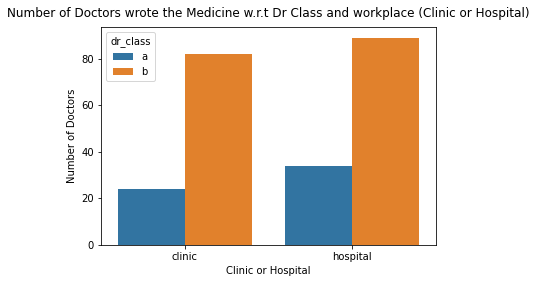

In [97]:
order = ["a", "b"]
g = sns.countplot(data = df_comp_w, x = "clinic_hos", hue = "dr_class")
g.set_title("Number of Doctors wrote the Medicine w.r.t Dr Class and workplace (Clinic or Hospital)", y = 1.02)
g.set(xlabel = "Clinic or Hospital", ylabel = "Number of Doctors")
plt.show()

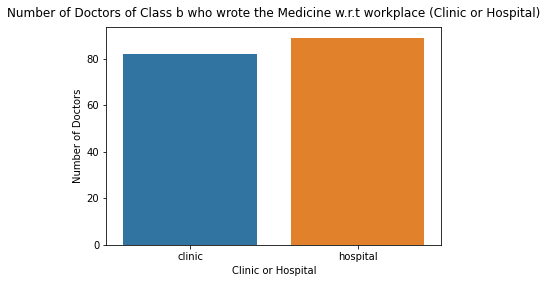

In [98]:
df_w_b = df_comp_w[df_comp_w["dr_class"] == "b"]
g = sns.countplot(data = df_w_b, x = "clinic_hos")
g.set_title("Number of Doctors of Class b who wrote the Medicine w.r.t workplace (Clinic or Hospital)", y = 1.02)
g.set(xlabel = "Clinic or Hospital", ylabel = "Number of Doctors")
plt.show()

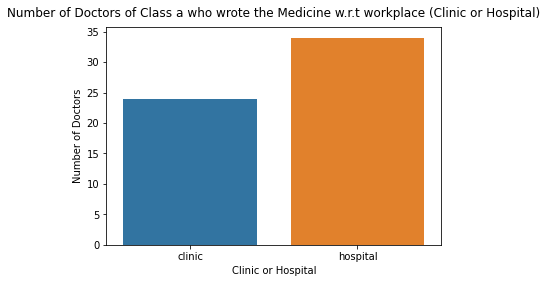

In [99]:
df_w_a = df_comp_w[df_comp_w["dr_class"] == "a"]
g = sns.countplot(data = df_w_a, x = "clinic_hos")
g.set_title("Number of Doctors of Class a who wrote the Medicine w.r.t workplace (Clinic or Hospital)", y = 1.02)
g.set(xlabel = "Clinic or Hospital", ylabel = "Number of Doctors")
plt.show()

* ## Number of Doctors wrote the medicine in the prescription in class b exceeds the same case with class a doctors
* ## in both classes doctors who wrote the medicine in hospital are more than doctors who wrote the medicine in clinics

## Most written medicine

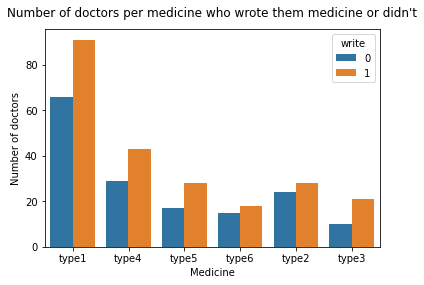

In [100]:
order = ["type1", "type2", "type3", "type4", "type5", "type6"]
g  = sns.countplot(data = df_comp, x = "medicine", hue = "write")
g.set_title("Number of doctors per medicine who wrote them medicine or didn't", y = 1.03)
g.set(xlabel = "Medicine", ylabel = "Number of doctors")
plt.show()

In [101]:
types = ["type1", "type2", "type3", "type4", "type5", "type6"]

dict_types = {t: 0 for t in types}
df_comp_w = df_comp[df_comp["write"] == 1].reset_index()

for i in range(len(df_comp_w)):
    
    med = df_comp_w.loc[i, "medicine"]
    
    if med in dict_types:
        dict_types[med] += 1

print("Number of doctors wrote the medicine in the prescription according each type are as follows:\n{}".format(dict_types))

Number of doctors wrote the medicine in the prescription according each type are as follows:
{'type1': 91, 'type2': 28, 'type3': 21, 'type4': 43, 'type5': 28, 'type6': 18}


* ## for each type of the medicine the written prescription exceeds the un written
* ## most written medicine is type 1

## speciality column Analysis

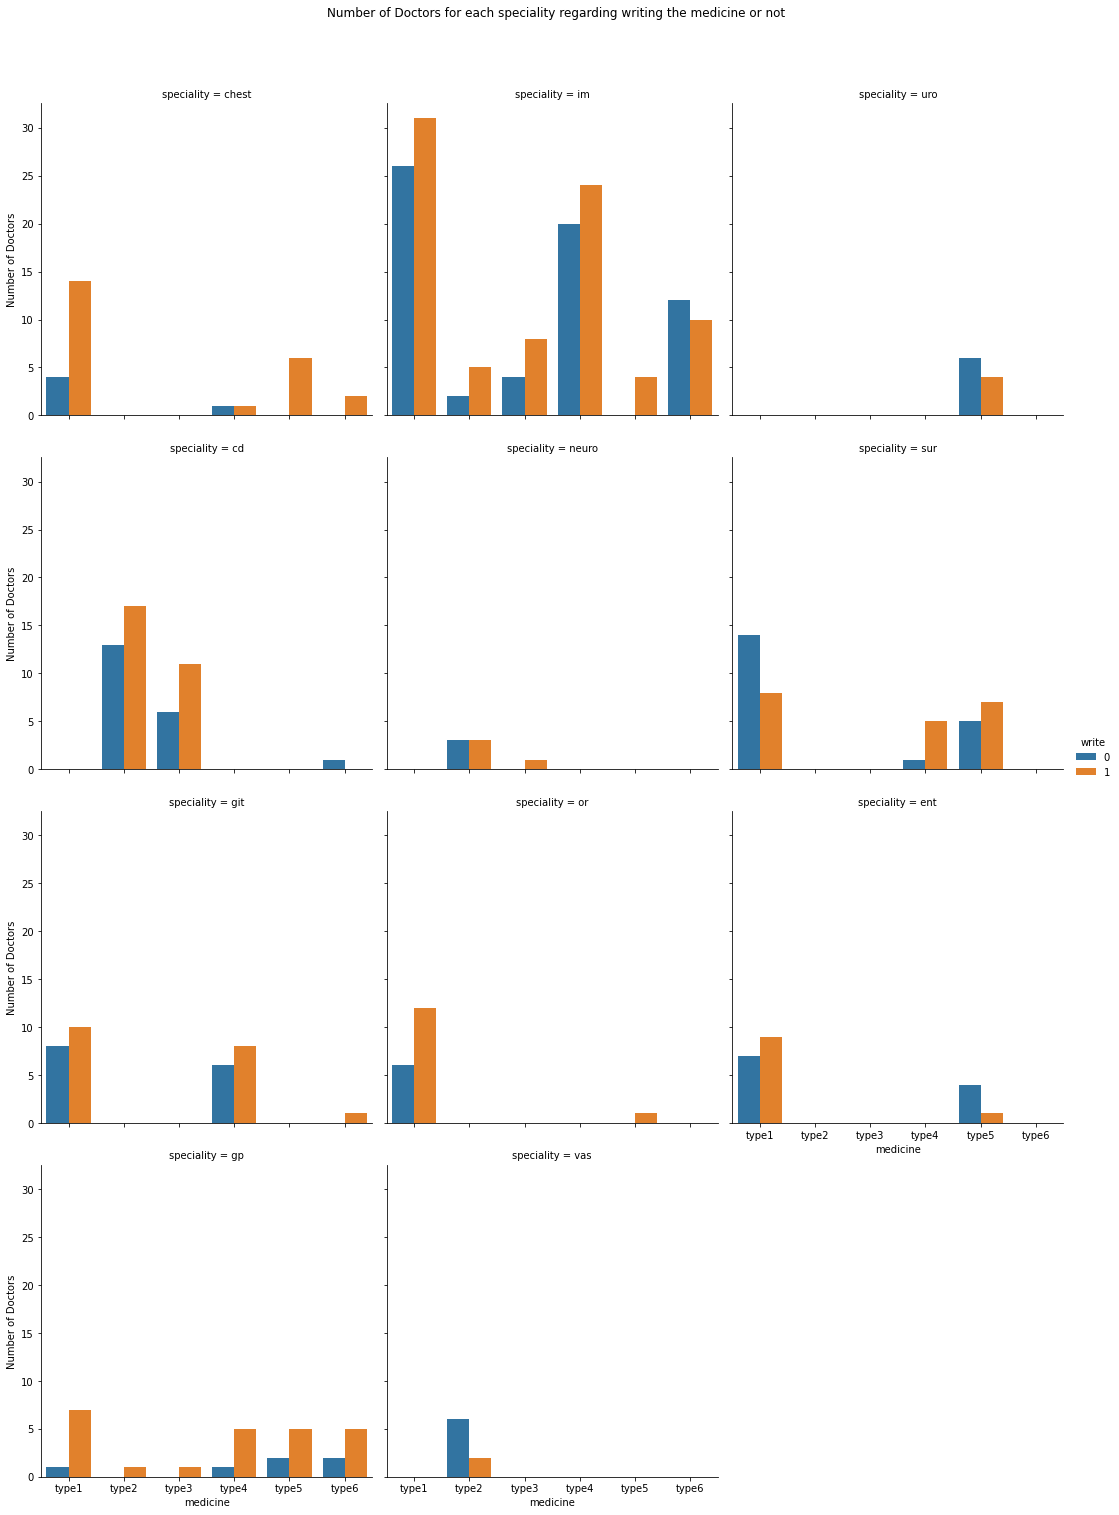

In [102]:
order = ["type1", "type2", "type3", "type4", "type5", "type6"]
g = sns.catplot(data = df_comp, x = "medicine", hue = "write", col = "speciality", col_wrap = 3, kind = "count", order = order)
g.fig.suptitle("Number of Doctors for each speciality regarding writing the medicine or not", y = 1.05)
g.set(xlabel = "medicine", ylabel = "Number of Doctors")
plt.show()

In [103]:
df_comp[(df_comp["speciality"] == "uro") & (df_comp["write"] == 1)]["dr_class"]

53     a
105    b
332    b
338    b
Name: dr_class, dtype: object

In [104]:
df_comp[(df_comp["speciality"] == "vas") & (df_comp["write"] == 0)]["dr_class"]

151    b
158    b
178    a
219    a
242    a
326    a
Name: dr_class, dtype: object

In [105]:
df_comp[(df_comp["speciality"] == "sur") & (df_comp["write"] == 0) & (df_comp["medicine"] == "type1")][["dr_class", "clinic_hos"]].value_counts()

dr_class  clinic_hos
a         hospital      6
b         hospital      6
a         clinic        1
b         clinic        1
dtype: int64

In [106]:
df_comp[(df_comp["speciality"] == "im") & (df_comp["write"] == 1) & (df_comp["medicine"] == "type6")][["clinic_hos", "dr_class"]].value_counts()

clinic_hos  dr_class
hospital    b           6
clinic      b           4
dtype: int64

In [107]:
df_comp[(df_comp["speciality"] == "ent") & (df_comp["write"] == 1) & (df_comp["medicine"] == "type5")][["clinic_hos", "dr_class"]].value_counts()

clinic_hos  dr_class
clinic      b           1
dtype: int64

* ## only the specialities gp and im are using the all 6 types it will be a good decision to focus on the doctors with these specialities
* ## also it will be a good choice to avoid the following specialites: vas, uro
* ## avoid targeting class a in uro speciality
* ## avoid targeting class a in vas speciality
* ## avoid type1 in sur speciality
* ## avoid targrting class a in type6 with im speciality 
* ## avoid type5 in ent speciality

## most medicine speciality written

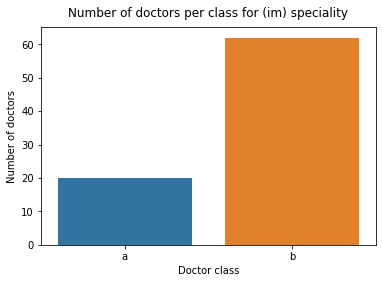

In [108]:
order = ["a", "b"]
im_class = df_comp_w[df_comp_w["speciality"] == "im"]
g = sns.countplot(data = im_class, x = "dr_class", order =order)
g.set(xlabel = "Doctor class", ylabel = "Number of doctors")
g.set_title("Number of doctors per class for (im) speciality", y = 1.02)
plt.show()

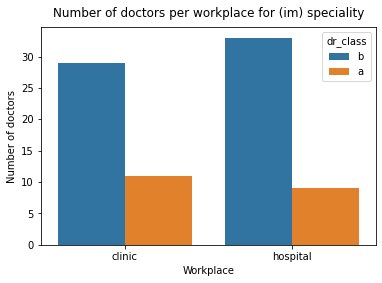

In [109]:
g = sns.countplot(data = im_class, x = "clinic_hos", hue = "dr_class")
g.set(xlabel = "Workplace", ylabel = "Number of doctors")
g.set_title("Number of doctors per workplace for (im) speciality", y = 1.02)
plt.show()

In [110]:
print(df_comp_w.groupby("speciality")["speciality"].agg("count").sort_values(ascending = False))

speciality
im       82
cd       28
gp       24
chest    23
sur      20
git      19
or       13
ent      10
neuro     4
uro       4
vas       2
Name: speciality, dtype: int64


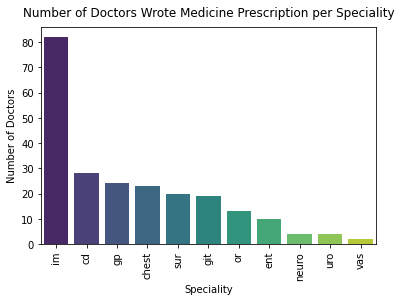

In [111]:
ordered_s = df_comp_w.groupby("speciality")["speciality"].agg("count").sort_values(ascending = False).index
colors = sns.color_palette("viridis", len(ordered_s))
g = sns.countplot(data = df_comp_w, x = "speciality", order = ordered_s, palette = colors)
g.set_title("Number of Doctors Wrote Medicine Prescription per Speciality", y = 1.02)
g.set(xlabel ="Speciality", ylabel = "Number of Doctors")
plt.xticks(rotation=90)
plt.show()

## most medicine speciality not written

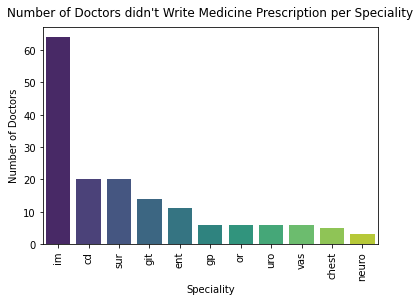

In [112]:
df_comp_nw = df_comp[df_comp["write"] == 0]
ordered_ns = df_comp_nw.groupby("speciality")["speciality"].agg("count").sort_values(ascending = False).index
colors = sns.color_palette("viridis", len(ordered_ns))
g = sns.countplot(data = df_comp_nw, x = "speciality", order = ordered_ns, palette = colors)
g.set_title("Number of Doctors didn't Write Medicine Prescription per Speciality", y = 1.02)
g.set(xlabel ="Speciality", ylabel = "Number of Doctors")
plt.xticks(rotation=90)
plt.show()

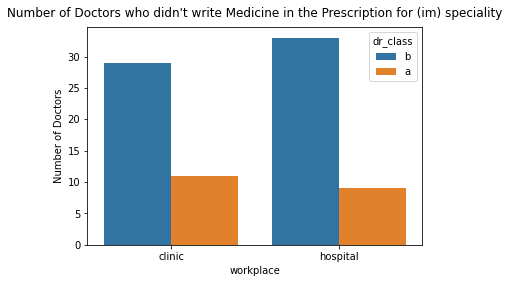

In [113]:
g = sns.countplot(data = im_class, x = "clinic_hos", hue = "dr_class")
g.set_title("Number of Doctors who didn't write Medicine in the Prescription for (im) speciality", y = 1.02)
g.set(xlabel ="workplace", ylabel = "Number of Doctors")
plt.show()

* ## speciality (im) is the most written and unwritten speciality and doctors in clinic are more likely not to write the medicine
* ## for the (im) speciality doctors with b class are more likely to write the medicine in the prescription

## key findings on targeting doctors within specific area

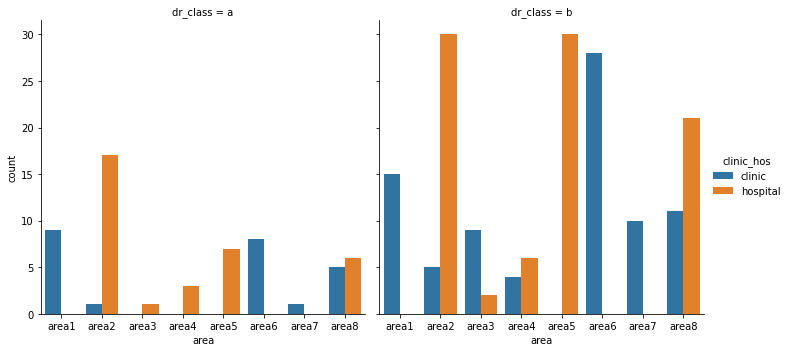

In [114]:
order = ["area1", "area2", "area3", "area4", "area5", "area6", "area7", "area8"]
sns.catplot(x = "area", data = df_comp_w, kind = "count", order = order, hue = "clinic_hos", col = "dr_class")
plt.show()

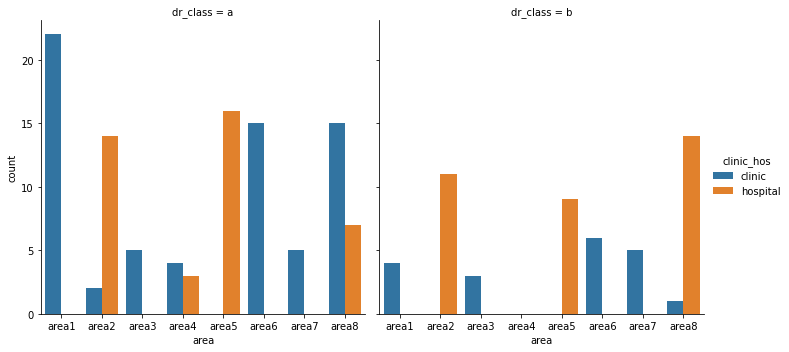

In [115]:
order = ["area1", "area2", "area3", "area4", "area5", "area6", "area7", "area8"]
sns.catplot(x = "area", data = df_comp_nw, kind = "count", order = order, hue = "clinic_hos", col = "dr_class")
plt.show()

* ## it will be a good decision to do the following to be more effecient on targeting doctors w.r.t area:
* ## focus on class b doctors only in area 1
* ## focus on hospitals only for area 3 for class a doctors
* ## in area 4 focus on class b doctors
* ## avoid dealing with doctors with class a in area 5, area 6 and area 7

## Medicine Price

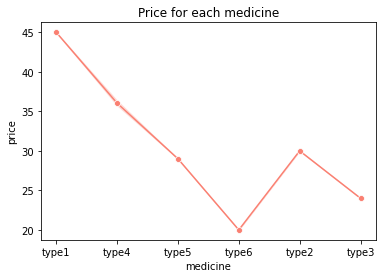

In [116]:
g = sns.lineplot(x = "medicine", data = df_comp, y = "price", color = "salmon", marker = "o")
g.set_title("Price for each medicine")
plt.show()

In [117]:
df_comp_w.groupby("speciality")["medicine"].value_counts()

speciality  medicine
cd          type2       17
            type3       11
chest       type1       14
            type5        6
            type6        2
            type4        1
ent         type1        9
            type5        1
git         type1       10
            type4        8
            type6        1
gp          type1        7
            type4        5
            type5        5
            type6        5
            type2        1
            type3        1
im          type1       31
            type4       24
            type6       10
            type3        8
            type2        5
            type5        4
neuro       type2        3
            type3        1
or          type1       12
            type5        1
sur         type1        8
            type5        7
            type4        5
uro         type5        4
vas         type2        2
Name: medicine, dtype: int64

## Exam Price

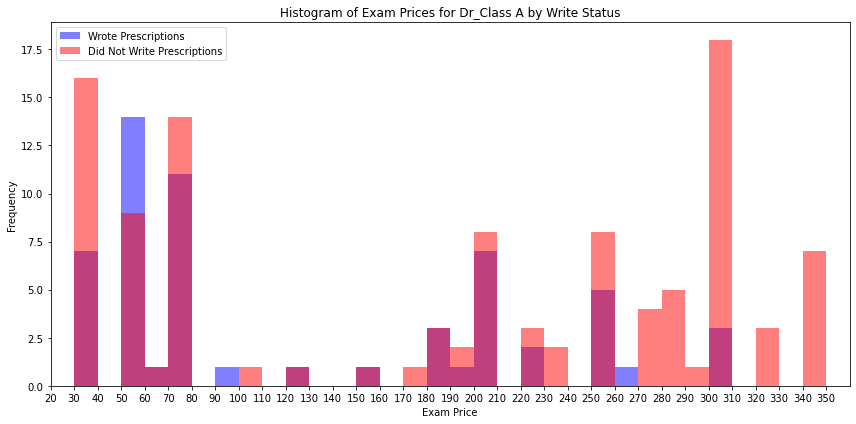

In [118]:

doc_write=df_comp[(df_comp["dr_class"] == "a") & (df_comp["write"] == 1)]
doc_not_write=df_comp[(df_comp["dr_class"] == "a") & (df_comp["write"] == 0)]


bins=np.arange(0,df_comp['exam_price'].max()+10,10)

plt.figure(figsize=(12, 6))
plt.hist(data=doc_write,x='exam_price',bins=bins,color="blue", alpha=0.5, label='Wrote Prescriptions')
plt.hist(data=doc_not_write,x='exam_price',bins=bins,color="red", alpha=0.5, label='Did Not Write Prescriptions')

plt.xlim(20, df_comp['exam_price'].max() + 10)

increment = 10  
x_ticks = np.arange(20, df_comp['exam_price'].max() + 10, increment)
plt.xticks(x_ticks)

plt.xlabel("Exam Price")
plt.ylabel("Frequency")
plt.title("Histogram of Exam Prices for Dr_Class A by Write Status")
plt.legend()


plt.tight_layout()
plt.show()

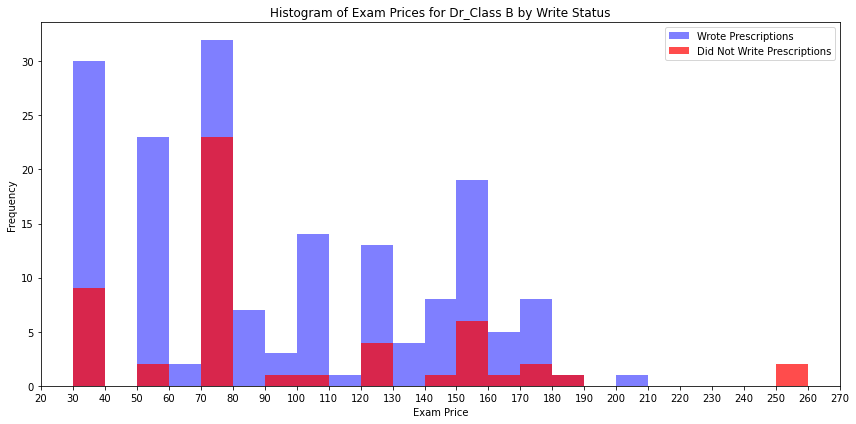

In [119]:
doc_write = df_comp[(df_comp["dr_class"] == "b") & (df_comp["write"] == 1)]  
doc_not_write = df_comp[(df_comp["dr_class"] == "b") & (df_comp["write"] == 0)] 


bins = np.arange(0, df_comp['exam_price'].max() + 10, 10)

plt.figure(figsize=(12, 6))
plt.hist(doc_write['exam_price'], bins=bins, color="blue", alpha=0.5, label='Wrote Prescriptions')
plt.hist(doc_not_write['exam_price'], bins=bins, color="red", alpha=0.7, label='Did Not Write Prescriptions')

plt.xlim(20, df_comp['exam_price'].max() - 80)


increment = 10 
x_ticks = np.arange(20, df_comp['exam_price'].max()-80 + 10, increment)
plt.xticks(x_ticks)

plt.xlabel("Exam Price")
plt.ylabel("Frequency")
plt.title("Histogram of Exam Prices for Dr_Class B by Write Status")
plt.legend()

plt.tight_layout()
plt.show()

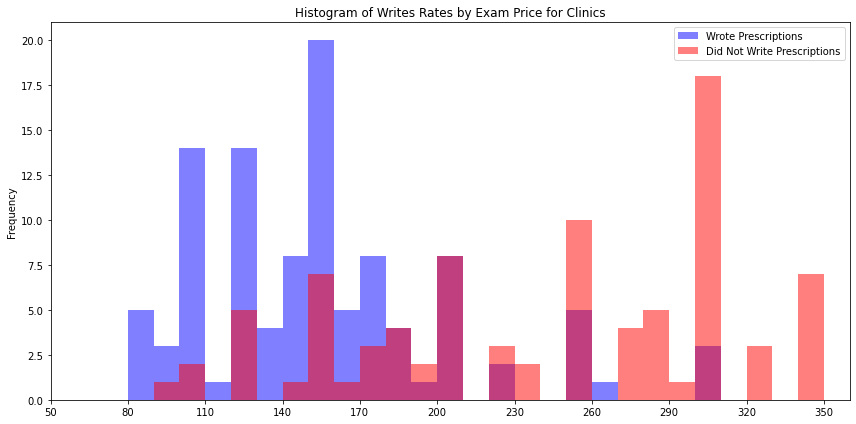

In [120]:
doc_write=df_comp[(df_comp["clinic_hos"] == "clinic") & (df_comp["write"] == 1)] 
doc_not_write=df_comp[(df_comp["clinic_hos"] == "clinic") & (df_comp["write"] == 0)] 

bins=np.arange(0,df_comp['exam_price'].max()+10,10)

plt.figure(figsize=(12, 6))
plt.hist(data=doc_write,x='exam_price',bins=bins,color="blue", alpha=0.5, label='Wrote Prescriptions')
plt.hist(data=doc_not_write,x='exam_price',bins=bins,color="red", alpha=0.5, label='Did Not Write Prescriptions')

plt.xlim(60, df_comp['exam_price'].max() + 10)

increment = 30 
x_ticks = np.arange(50, df_comp['exam_price'].max() + 10, increment)
plt.xticks(x_ticks)

plt.ylabel("Frequency")
plt.title("Histogram of Writes Rates by Exam Price for Clinics")
plt.legend()

plt.tight_layout()
plt.show()


* ## for exam price in the clincs more than 180 number of doctors wrote the exam is always less than the doctors who didn't

## Outliers Analysis

In [121]:
df_comp.describe()

,id_m,price,exam_price,write
count,390.000000,390.000000,390.000000,390.000000
mean,195.500000,35.715385,121.205128,0.587179
std,112.727548,8.751263,86.729844,0.492974
min,1.000000,20.000000,30.000000,0.000000
25%,98.250000,29.000000,50.000000,0.000000
50%,195.500000,36.000000,80.000000,1.000000
75%,292.750000,45.000000,170.000000,1.000000
max,390.000000,45.000000,350.000000,1.000000


<AxesSubplot:xlabel='speciality', ylabel='exam_price'>

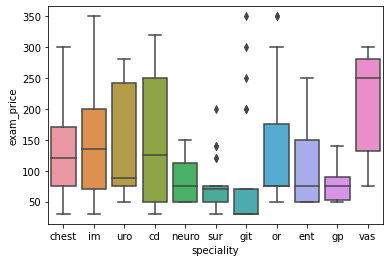

In [122]:
sns.boxplot(data = df_comp, x = "speciality", y = "exam_price")


In [123]:
sur_75q = df_comp[df_comp["speciality"] == "sur"]["exam_price"].quantile(.75)
sur_25q = df_comp[df_comp["speciality"] == "sur"]["exam_price"].quantile(.25)
sur_iqr = sur_75q - sur_25q
upper = sur_75q + (1.5 * sur_iqr)
lower = sur_25q - (1.5 * sur_iqr)
sur_outliers = df_comp[(df_comp["speciality"] == "sur") & (df_comp["exam_price"] > upper) | (df_comp["exam_price"] < lower)]
display(sur_outliers)

,id_m,medicine,price,area,speciality,dr_class,exam_price,clinic_hos,write
37,38,type1,45,area2,sur,b,120,clinic,1
45,46,type4,36,area2,sur,b,120,clinic,1
264,265,type5,29,area6,sur,b,140,clinic,1
270,271,type1,45,area6,sur,b,140,clinic,0
302,303,type1,45,area7,sur,a,200,clinic,0


In [124]:
git_75q = df_comp[df_comp["speciality"] == "git"]["exam_price"].quantile(.75)
git_25q = df_comp[df_comp["speciality"] == "git"]["exam_price"].quantile(.25)
git_iqr = git_75q - git_25q
upper = git_75q + (1.5 * git_iqr)
lower = git_75q - (1.5 * git_iqr)
git_outliers = df_comp[(df_comp["speciality"] == "git") & (df_comp["exam_price"] > upper) | (df_comp["exam_price"] < lower)]
display(git_outliers)

,id_m,medicine,price,area,speciality,dr_class,exam_price,clinic_hos,write
12,13,type4,36,area3,git,a,300,clinic,0
28,29,type4,36,area2,git,a,350,clinic,0
42,43,type4,36,area8,git,a,250,clinic,1
356,357,type4,30,area6,git,a,200,clinic,1
360,361,type1,45,area6,git,a,200,clinic,1


In [125]:
or_75q = df_comp[df_comp["speciality"] == "or"]["exam_price"].quantile(.75)
or_25q = df_comp[df_comp["speciality"] == "or"]["exam_price"].quantile(.25)
or_iqr = or_75q - or_25q
upper = or_75q + (1.5 * or_iqr)
lower = or_75q - (1.5 * or_iqr)
or_outliers = df_comp[(df_comp["speciality"] == "or") & (df_comp["exam_price"] > upper) | (df_comp["exam_price"] < lower)]
display(or_outliers)

,id_m,medicine,price,area,speciality,dr_class,exam_price,clinic_hos,write
108,109,type1,45,area1,or,a,350,clinic,0
196,197,type1,45,area1,or,a,350,clinic,0


<AxesSubplot:xlabel='speciality', ylabel='exam_price'>

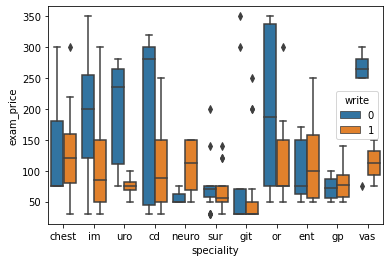

In [126]:
sns.boxplot(data = df_comp, x = "speciality", y = "exam_price", hue = "write")

* ## according the previous outlier analysis most of the doctors who have very high exam price tend not to write the medicine

<AxesSubplot:>

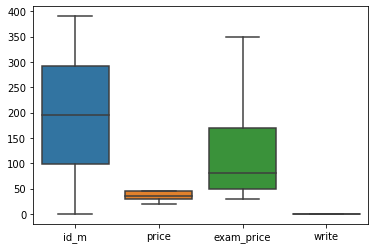

In [127]:
numerical_data = df_comp.select_dtypes(include = int)
sns.boxplot(data = numerical_data)

## Conclusion:
* ### number of doctors wrote the medicine in class b exceeds the number of class a.
* ### doctors with class a who wrote the medicine is almost equal to doctors with class b who didn't write the medicine.
* ### Number of Doctors wrote the medicine in the prescription in class b exceeds the same case with class a doctors.
* ### in both classes doctors who wrote the medicine in hospital are more than doctors who wrote the medicine in clinics.
* ### for each type of the medicine the written prescription exceeds the un written.
* ### most written medicine is type 1.
* ### only the specialities gp and im are using the all 6 types it will be a good decision to focus on the doctors with these specialities.
* ### also it will be a good choice to avoid the following specialites: vas, uro.
* ### avoid targeting class a in uro speciality.
* ### avoid targeting class a in vas speciality.
* ### avoid type1 in sur speciality.
* ### avoid targrting class a in type6 with im speciality.
* ### avoid type5 in ent speciality.
* ### speciality im is the most written and unwritten speciality and doctors in clinic are more likely not to write the medicine.
* ### for the im speciality doctors with b class are more likely to write the medicine in the prescription.
* ### focus on class b doctors only in area 1.
* ### focus on hospitals only for area 3 for class a doctors.
* ### in area 4 focus on class b doctors.
* ### avoid dealing with doctors with class a in area 5, area 6 and area 7.
* ### according outliers analysis most of the doctors who have very high exam price tend not to write the medicine.

In [128]:
data = df_comp

## Training the K-Means Clustering model on the dataset

Silhouette coefficient: 0.5465681193714097


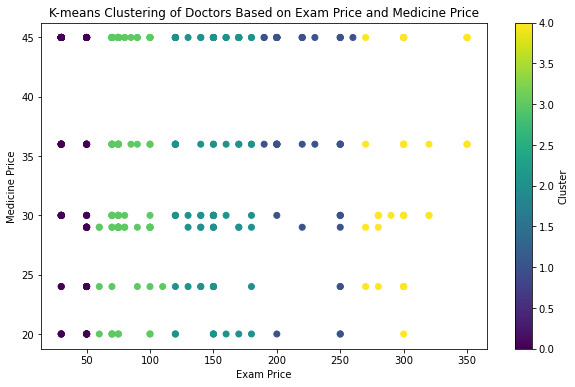

In [129]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Select relevant features for clustering
# We're including exam_price, speciality, clinic_hos, write, medicine, price
columns_for_clustering = ['exam_price', 'medicine', 'price','area','speciality','dr_class','clinic_hos']

# Step 2: Preprocessing
# One-hot encode categorical variables (speciality, clinic_hos, and medicine)
data_clustering = pd.get_dummies(data[columns_for_clustering], drop_first=True)

# Step 3: K-means clustering
# Initialize KMeans with 3 clusters (this number can be adjusted)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans algorithm to the data
kmeans.fit(data_clustering)

# Add the cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Evaluate the clustering results
silhouette_avg = silhouette_score(data_clustering, data['Cluster'])
print("Silhouette coefficient:", silhouette_avg)

# Step 4: Visualize the clusters
# Example visualization using scatter plots of exam_price and medicine price
plt.figure(figsize=(10, 6))
plt.scatter(data['exam_price'], data['price'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Exam Price')
plt.ylabel('Medicine Price')
plt.title('K-means Clustering of Doctors Based on Exam Price and Medicine Price')
plt.colorbar(label='Cluster')
plt.show()

### Normalizing Numerical Features

In data analysis and machine learning, it is crucial to normalize numerical features to ensure that each feature is treated equally during model training. Many algorithms, particularly distance-based or gradient-based methods, are sensitive to the scale of the input data. Therefore, it is important to scale numerical features so that they contribute equally to the model.

Normalization does not alter the distribution or shape of the data but ensures that the feature values are transformed to a common scale. In this case, we will apply **Min-Max Scaling**, which transforms each feature to a range between `[0, 1]`. This helps standardize features such as `exam_price` or `medicine_price`, which may have different ranges.

Once normalized, the numerical features will be ready for clustering or other machine learning techniques.

In [130]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Split the data into features and target label
income_raw = data['write']  # Assuming 'write' is the target variable
features_raw = data.drop('write', axis=1)  # Drop the target variable from features

# Identify numeric columns in the features DataFrame
numeric_col = features_raw.select_dtypes(include=['float64', 'int64']).columns  # Get numeric columns

print("Numerical columns:", numeric_col)

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()  # default=(0, 1)

# Scale only the numeric columns in features_raw
features_raw[numeric_col] = scaler.fit_transform(features_raw[numeric_col])

# Show an example of a record with scaling applied
display(features_raw.head(5))

Numerical columns: Index(['id_m', 'price', 'exam_price'], dtype='object')


,id_m,medicine,price,area,speciality,dr_class,exam_price,clinic_hos,Cluster
0,0.000000,type1,1.00,area1,chest,a,0.531250,clinic,1
1,0.002571,type4,0.64,area2,im,b,0.218750,clinic,3
2,0.005141,type1,1.00,area8,chest,a,0.140625,hospital,3
3,0.007712,type1,1.00,area5,chest,a,0.000000,hospital,0
4,0.010283,type5,0.36,area6,uro,a,0.593750,clinic,1


### Implementation: Data Preprocessing

In our dataset, we have several features that are non-numeric. Learning algorithms typically expect input to be numeric, which necessitates converting these non-numeric features (known as *categorical variables*). One popular method for conversion is **one-hot encoding**. This technique creates a _"dummy"_ variable for each possible category of each non-numeric feature. 

For example, consider a feature named `someFeature` with three possible entries: `A`, `B`, or `C`. This feature can be encoded into three new features: `someFeature_A`, `someFeature_B`, and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

In the code cell below, you will implement the following steps:
- Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the categorical features in the dataset.
- Convert any necessary non-numeric target labels into numerical entries.

In [131]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_raw)

# Print the number of features after one-hot encoding
#encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(features_final.shape[1]))

# Uncomment the following line to see the encoded feature names
display(features_final[0:10])

33 total features after one-hot encoding.


,id_m,price,exam_price,Cluster,medicine_type1,medicine_type2,medicine_type3,medicine_type4,medicine_type5,medicine_type6,...,speciality_im,speciality_neuro,speciality_or,speciality_sur,speciality_uro,speciality_vas,dr_class_a,dr_class_b,clinic_hos_clinic,clinic_hos_hospital
0,0.000000,1.00,0.531250,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.002571,0.64,0.218750,3,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0.005141,1.00,0.140625,3,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.007712,1.00,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0.010283,0.36,0.593750,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
5,0.012853,0.36,0.343750,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
6,0.015424,0.00,0.125000,3,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
7,0.017995,0.64,0.140625,3,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
8,0.020566,0.40,0.375000,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9,0.023136,0.40,0.375000,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


## Applying principal components analysis

In [132]:
from sklearn.decomposition import PCA

# Apply PCA before train_test_split
pca = PCA(n_components=0.90)  # Keep 90% of the variance
features_reduced = pca.fit_transform(features_final)

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [133]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_reduced,income_raw, test_size = 0.2, random_state = 5)

from sklearn.model_selection import train_test_split

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 312 samples.
Testing set has 78 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Decision Trees
- Logistic Regression
- Support Vector Machines (SVM)
- XGBoost
- AdaBoost

### Implementation - Creating a Training and Predicting Pipeline

To evaluate the performance of the selected models, we need to create a training and predicting pipeline that efficiently trains and tests these models. This process will allow us to calculate both accuracy and F-scores on the training and testing datasets.

**Steps to implement:**

1. **Import Metrics:**  
   Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to evaluate the models.

2. **Import Selected Models:**  
   Import the models `LogisticRegression`, `SVC`, `DecisionTreeClassifier`, and other classifiers such as `AdaBoostClassifier` and `XGBClassifier`.

3. **Training the Models:**  
   Use the `fit` method to train the models on the training set, and then predict the results using the `predict` method.

4. **Evaluating the Models:**  
   For each model:
   - Calculate the accuracy score for both the training and testing sets using `accuracy_score`.
   - Calculate the F-score for both the training and testing sets using `fbeta_score`, making sure to set the `beta` parameter appropriately for evaluating performance beyond just accuracy.

In [134]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVC": SVC(),
    "Random Forest" : RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(),
}

# Initialize variables to store the best model information
best_model = None
best_test_accuracy = 0
best_test_fbeta = 0
best_model_name = ""

# Train and evaluate models
for model_name, model in models.items():
    print(f"\nModel: {model_name}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # F-beta scores
    train_fbeta = fbeta_score(y_train, y_train_pred, beta=0.2)
    test_fbeta = fbeta_score(y_test, y_test_pred, beta=0.2)
    
    # Print accuracy and fbeta scores
    print(f"Training Accuracy: {round(train_accuracy * 100)}%")
    print(f"Testing Accuracy: {round(test_accuracy * 100)}%")
    print(f"Training F-beta (beta=0.2): {round(train_fbeta * 100)}%")
    print(f"Testing F-beta (beta=0.2): {round(test_fbeta * 100)}%")
    
    # Update best model based on the combination of accuracy and F-beta score on the test set
    if test_accuracy > best_test_accuracy and test_fbeta > best_test_fbeta:
        best_test_accuracy = test_accuracy
        best_test_fbeta = test_fbeta
        best_model = model
        best_model_name = model_name
    
    # Print classification report for testing set
    print("\nClassification Report (Testing Set):")
    print(classification_report(y_test, y_test_pred))

# Print the best model based on test accuracy and F-beta score
print(f"\nBest Model: {best_model_name}")
print(f"Best Test Accuracy: {round(best_test_accuracy * 100)}%")
print(f"Best Test F-beta (beta=0.2): {round(best_test_fbeta * 100)}%")



Model: Decision Tree
Training Accuracy: 100%
Testing Accuracy: 58%
Training F-beta (beta=0.2): 100%
Testing F-beta (beta=0.2): 71%

Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.44      0.61      0.51        28
           1       0.72      0.56      0.63        50

    accuracy                           0.58        78
   macro avg       0.58      0.58      0.57        78
weighted avg       0.62      0.58      0.59        78


Model: Logistic Regression
Training Accuracy: 72%
Testing Accuracy: 81%
Training F-beta (beta=0.2): 73%
Testing F-beta (beta=0.2): 87%

Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        28
           1       0.87      0.82      0.85        50

    accuracy                           0.81        78
   macro avg       0.79      0.80      0.80        78
weighted avg       0.81      0.81      0.81        78


M

In [135]:
# Import necessary libraries for tuning
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, fbeta_score, classification_report

# Define the parameter grid for tuning SVC with near-default values
param_grid = {
    'C': [0.1, 1, 50, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}


# Initialize the SVC model
svc = SVC()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model with the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and accuracy score
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.3f}")

# Evaluate the tuned model on the test set
best_svc = grid_search.best_estimator_
y_test_pred = best_svc.predict(X_test)

# Print test accuracy and F-beta score
test_accuracy = accuracy_score(y_test, y_test_pred)
test_fbeta = fbeta_score(y_test, y_test_pred, beta=0.2)

print(f"Test Accuracy: {round(test_accuracy * 100)}%")
print(f"Test F-beta (beta=0.2): {round(test_fbeta * 100)}%")

# Print classification report for the tuned model on the test set
print("\nClassification Report (Testing Set):")
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.712
Test Accuracy: 65%
Test F-beta (beta=0.2): 74%

Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.52      0.57      0.54        28
           1       0.74      0.70      0.72        50

    accuracy                           0.65        78
   macro avg       0.63      0.64      0.63        78
weighted avg       0.66      0.65      0.66        78



In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Perform data preprocessing and feature engineering if needed

# Initialize the default Logistic Regression model
logreg = LogisticRegression()

# Fit the default model and evaluate its performance
logreg.fit(X_train, y_train)
y_test_pred_default = logreg.predict(X_test)
test_accuracy_default = accuracy_score(y_test, y_test_pred_default)

# Define hyperparameters for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15]
}

# Use GridSearchCV to find the best hyperparameters for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best Random Forest model on the test set
y_test_pred_rf = best_rf_model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Print the results
print(f"Test F-beta (beta=0.2): {round(test_fbeta * 100)}%")
print(f"Logistic Regression Testing Accuracy: {round(test_accuracy_default * 100)}%")
print(classification_report(y_test, y_test_pred_rf))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test F-beta (beta=0.2): 74%
Logistic Regression Testing Accuracy: 81%
              precision    recall  f1-score   support

           0       0.50      0.61      0.55        28
           1       0.75      0.66      0.70        50

    accuracy                           0.64        78
   macro avg       0.62      0.63      0.63        78
weighted avg       0.66      0.64      0.65        78

